In [109]:
def func(x, sign=1.0):
    return sign*(2*x[0]*x[1] + 2*x[0] - x[0]**2 - 2*x[1]**2)

In [110]:
x=[1,1]
func(x)

1.0

In [111]:
from scipy.optimize import minimize

In [112]:
res = minimize(func, [-1.0,1.0], args=(-1.0,), method='SLSQP', options={'disp': True})

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -2.0
            Iterations: 4
            Function evaluations: 17
            Gradient evaluations: 4


In [113]:
print(res.x)

[ 1.99999994  0.99999995]


In [114]:
import traml

In [115]:
a = traml.Stack()

|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |


In [116]:
a.add(111407, 20)

|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     111407 | 20               | passive   |


In [117]:
def av(TR, stack, c, delta):
    x_low = find_nearest(stack.x, c-delta)
    x_high = find_nearest(stack.x, c+delta)
    if TR == 'T':
        T = stack.get_T().real
        return np.mean(T[x_low:x_high])
    if TR =='R':
        R = stack.get_R().real
        return np.mean(R[x_low:x_high])

In [118]:
import numpy as np

In [119]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx
    

In [120]:
av('T',a, 0.8, 0.4)

0.91760432255908819

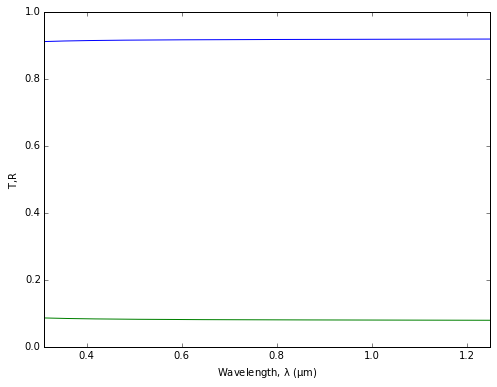

In [121]:
%matplotlib inline
a.plot()

In [122]:
a.add(111408, 20)

|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     111407 | 20               | passive   |
|   2 |     111408 | 20               | passive   |


In [123]:
a.add(111704)

|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     111407 | 20               | passive   |
|   2 |     111408 | 20               | passive   |
|   3 |     111704 | 100              | passive   |


In [124]:
a.repeat('1,2', 15)

|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     111407 | 20               | passive   |
|   2 |     111408 | 20               | passive   |
|   3 |     111704 | 100              | passive   |
|   4 |     111407 | 20               | passive   |
|   5 |     111408 | 20               | passive   |
|   6 |     111407 | 20               | passive   |
|   7 |     111408 | 20               | passive   |
|   8 |     111407 | 20               | passive   |
|   9 |     111408 | 20               | passive   |
|  10 |     111407 | 20               | passive   |
|  11 |     111408 | 20               | passive   |
|  12 |     111407 | 20               | passive   |
|  13 |     111408 | 20               | passive   |
|  14 |     111407 | 20               | passive   |
|  15 |     111408 | 20               | passive   |
|  16 |     111407 | 20               | passive   |
|  17 |     

In [ ]:
av('R', a, 0.51, 0.005)

0.049352959682472872

In [ ]:
a.plot()